In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report

In [2]:
data = pd.read_csv('C:/Users/Administrator/Desktop/DataTrained/Data/creditcard.csv')

In [4]:
data.shape

(284807, 31)

In [5]:
data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [6]:
X_train, X_test, y_train, y_test = train_test_split(data.drop('Class', axis=1), data['Class'], test_size=0.20, random_state=42)

In [7]:
clf = LogisticRegression()

In [8]:
clf.fit(X_train, y_train)

C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [9]:
y_pred = clf.predict(X_test)

In [10]:
cr = (classification_report(y_test, y_pred))

In [15]:
print(cr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.83      0.53      0.65        98

    accuracy                           1.00     56962
   macro avg       0.91      0.77      0.82     56962
weighted avg       1.00      1.00      1.00     56962



In [12]:
cm = (metrics.confusion_matrix(y_test, y_pred))

In [13]:
cm

array([[56853,    11],
       [   46,    52]], dtype=int64)

In [16]:
a= (metrics.accuracy_score(y_test, y_pred))
print(a)

0.9989993328885924


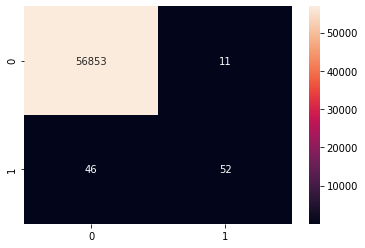

In [19]:
sns.heatmap(cm, annot=True, fmt='d')
plt.show()

In [20]:
df1 = pd.DataFrame({'Actual':y_test, 'Predicted': y_pred})
print(df1.head(25))

        Actual  Predicted
43428        1          1
49906        0          0
29474        0          0
276481       0          0
278846       0          0
101565       0          0
260880       0          0
214337       0          0
201575       0          0
81055        0          0
134976       0          0
237701       0          0
256836       0          0
97650        0          0
158290       0          0
246697       0          0
68279        0          0
267585       0          0
26525        0          0
74422        0          0
206357       0          0
257395       0          0
283656       0          0
231156       0          0
38442        0          0


Roc Curve evaluation


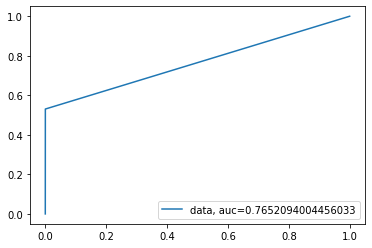

In [21]:
print("Roc Curve evaluation")
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = metrics.roc_auc_score(y_test, y_pred)
plt.plot(fpr,tpr,label="data, auc="+str(auc))
plt.legend(loc=4)
plt.show()